<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Clase_4_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterización

Se tiene un conjunto de datos para el cual se quiere un número de grupos a determinar por el analista y que estén conformados de manera que los clientes tengan características de consumo lo más parecidas posibles. Para ello se ha determinado que las variables más representativas para crear estos grupos son el gasto en dolares correspondiente a seis categorías: vino, frutas, carne, pescado, dulces y oro.

**Conexión con drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargue del archivo**

In [5]:
import pandas as pd
path= '/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Aprendizaje no supervisado/marketing_campaign.csv'
df= pd.read_csv(path, sep="\t")

In [19]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Subset

Se debe hacer una subconjunto que se utilizarán para el clustering, en este caso los datos del gasto en dolares para cada una de las categorias: wines, fruits, mean, fish, sweet, gold.

## Forma 1 de crear el subconjunto de datos
Usando el nombre de las columnas

In [7]:
df.columns # Para conocer el nombre de las columnas

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [18]:
df_cat= df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


## Forma 2 de crear el subconjunto de datos
Usando el número de las columnas

In [9]:
data=df.iloc[:, 10:16] #datos para clustering
data.head()

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases
0,88,546,172,88,88,3
1,1,6,2,1,6,2
2,49,127,111,21,42,1
3,4,20,10,3,5,2
4,43,118,46,27,15,5


##Instalación de librerías

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Exploración preliminar de las variables

Matriz de correlaciones

Los supermercado usan estan correlaciones para planear la ubicación de productos en los estantes.

In [11]:
corr_matrix = df_cat.corr()
corr_matrix

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
MntSweetProducts,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
MntGoldProds,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


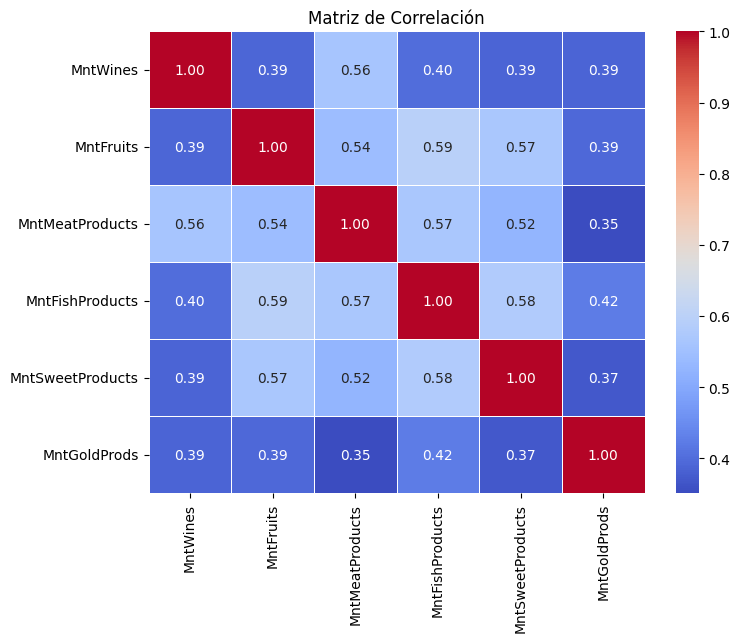

In [12]:
plt.figure(figsize=(8,6))  # Ajusta el tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

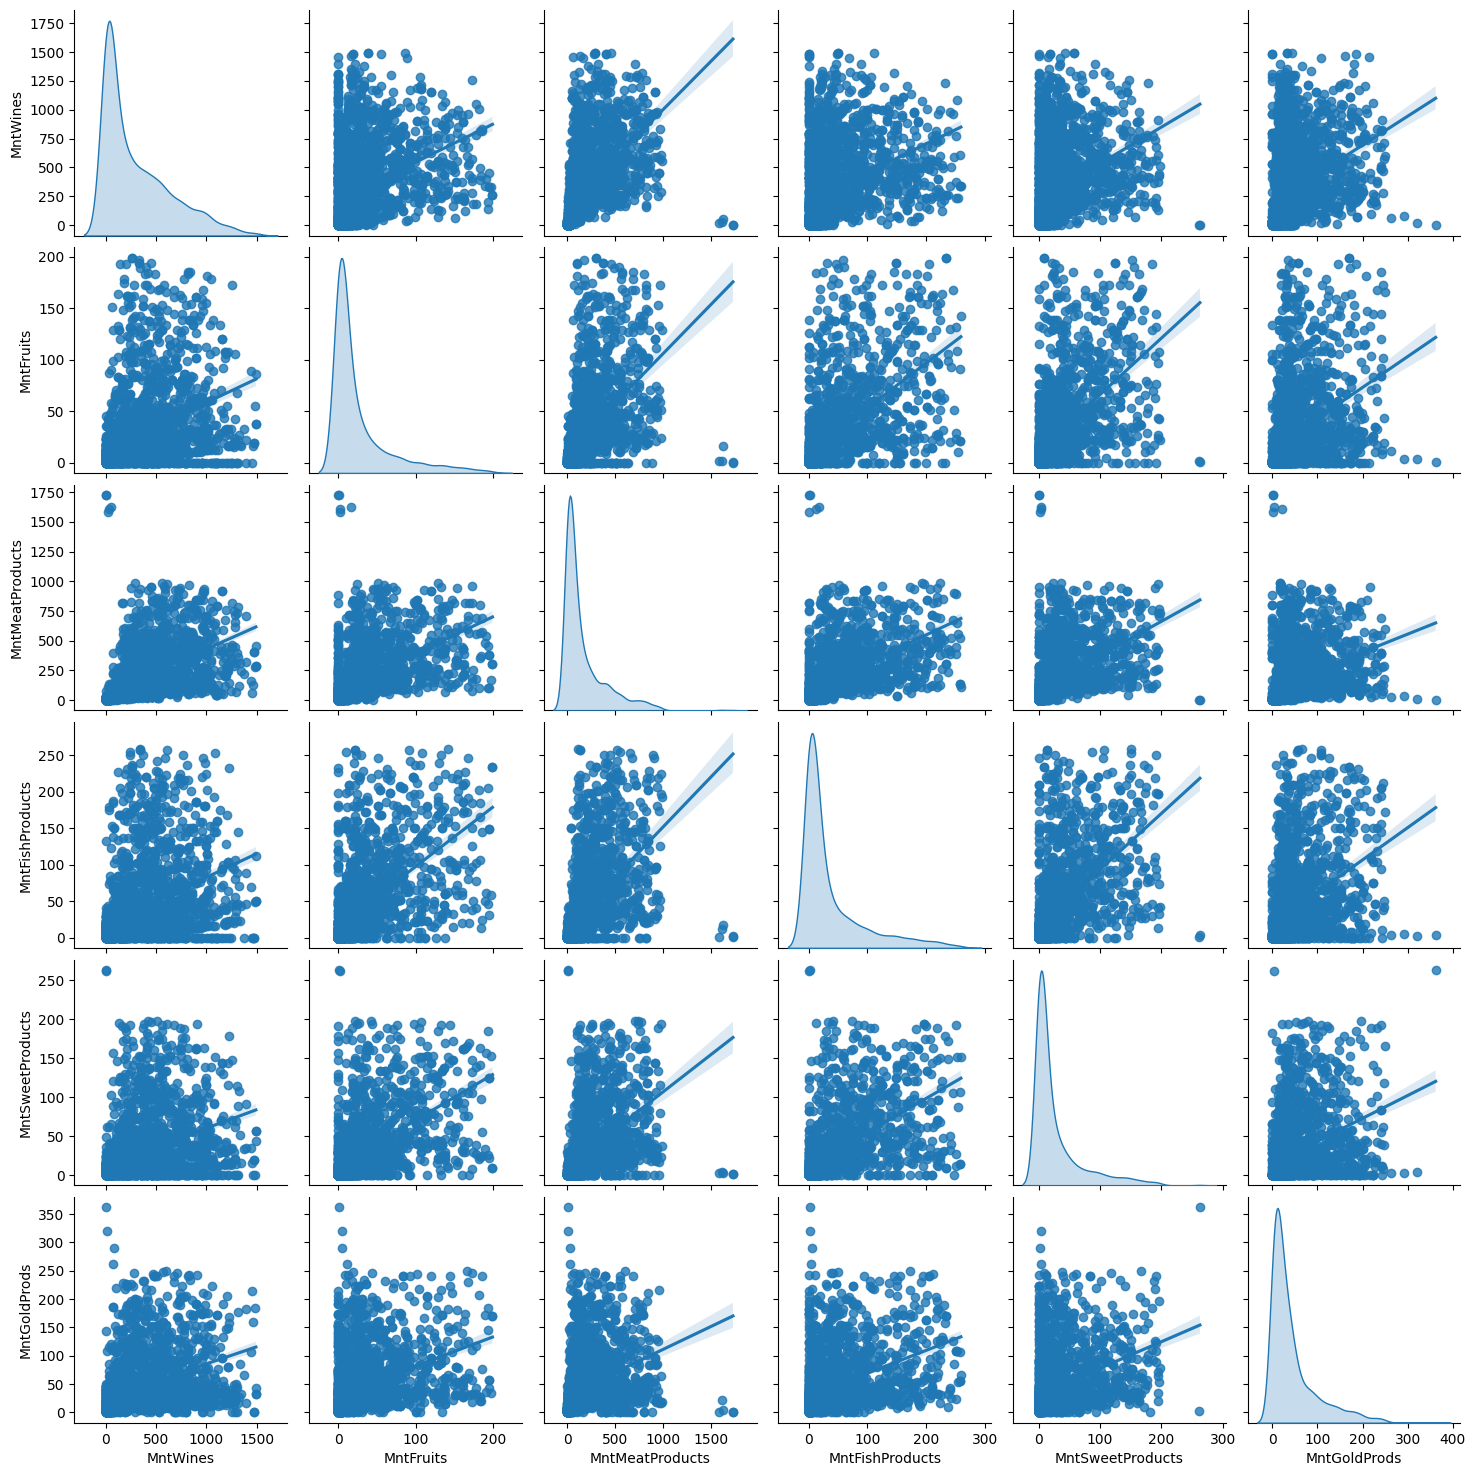

In [13]:
sns.pairplot(df_cat, kind="reg", diag_kind="kde")
plt.show()


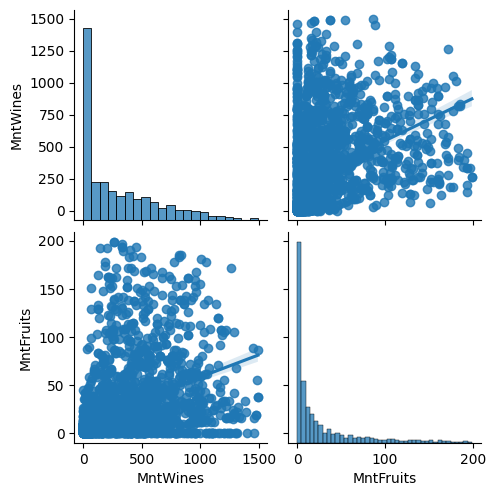

In [14]:
sns.pairplot(df_cat[['MntWines','MntFruits']], kind="reg")
plt.show()

## Estandarización de variables

La estandarización de variables es un proceso de transformación en el que se ajustan los valores de una variable para que tengan una media de 0 y una desviación estándar de 1.

## Fórmula de la estandarización

Cada valor de la variable x se transforma así:
Z=(x−μ)/σ


Donde:

    Z = Valor estandarizado
    x = Valor original
    μ = Media de la variable
    σ = Desviación estándar de la variable

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cat)
scaled_features

array([[ 0.98378127,  1.55157698,  1.67970233,  2.46214705,  1.4765001 ,
         0.84320691],
       [-0.87047948, -0.63630116, -0.71322541, -0.65044925, -0.63150318,
        -0.72900579],
       [ 0.36272278,  0.57080402, -0.17703234,  1.34527426, -0.14690472,
        -0.03876607],
       ...,
       [ 1.79502034,  0.545656  ,  0.22178895, -0.10116755, -0.36497403,
        -0.38388593],
       [ 0.36866592,  0.09299156,  0.20849491,  0.77768317,  0.07116458,
         0.32552712],
       [-0.65355475, -0.58600511, -0.46950129, -0.65044925, -0.63150318,
        -0.4414059 ]])

In [20]:
est=pd.DataFrame(scaled_features, columns=df_cat.columns)
est

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207
1,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006
2,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766
3,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179
4,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446
...,...,...,...,...,...,...
2235,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766
2236,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659
2237,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886
2238,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527


# Kmeans

Se crea crea el modelo de kmeans

In [21]:
kmeans = KMeans(
  init="random", # Este parámetro determina donde se ubican los centroides inicialmente
  n_clusters=3, # Corresponde al número de clusters que se van a crear
  n_init=10, # El número de veces que se iniciarán los centroides para seleccionar los mejores, según la inercia
  max_iter=300, # Número máximo de iteraciones para encontrar los clusters optimos
  random_state=42 # Este valor asegura que los resultados son reproducibles
  )

Ajuste del modelo

In [22]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [23]:
kmeans.inertia_ # es la medida de la suma de las distancias al cuadrado entre cada punto y el centroide.
# Entre menor sea este valor, generalmente indica una mejor clusterización.
# Pero esta no debería ser la medida que determina el número de clusters.

6318.427062664645

In [24]:
kmeans.cluster_centers_ # Muestra los centroides de los clusters

array([[-0.61908361, -0.5003944 , -0.58326963, -0.52166902, -0.50138979,
        -0.48639229],
       [ 0.64041779,  1.5888154 ,  1.20150635,  1.63535737,  1.66514736,
         0.88281773],
       [ 1.02390537,  0.13750133,  0.5793242 ,  0.15688142,  0.09063429,
         0.55984891]])

Los centroides estan estandarizados por lo tanto los queremos en su formato original

In [28]:
standardized_centroids = kmeans.cluster_centers_

original_centroids = scaler.inverse_transform(standardized_centroids)
original_centroids

array([[  61.6686799 ,    5.35893011,   29.01466782,    7.22174288,
           5.37014668,   15.75323555],
       [ 480.58241758,   43.51648352,  339.20879121,   93.20879121,
         141.57142857,  112.14285714],
       [ 603.38983051,   84.13559322,  573.74576271,  197.71186441,
          37.72881356,  147.01694915],
       [ 410.41772152,  138.3164557 ,  317.16455696,   69.35443038,
          71.30379747,   75.73417722],
       [ 495.64666667,   25.02666667,  169.88      ,   30.86      ,
          19.69333333,  155.38666667],
       [ 606.24691358,   12.98353909,  133.5473251 ,   15.81893004,
          12.55144033,   36.79012346],
       [ 598.20987654,  118.81481481,  549.96296296,  161.87654321,
         126.92592593,   65.85185185],
       [1020.96774194,   40.88709677,  397.05645161,   65.62096774,
          48.31451613,   41.18548387],
       [ 338.76216216,   39.92432432,  231.70810811,   93.6       ,
          46.95135135,   49.38378378],
       [ 553.55072464,   56.02898551,

Ya tenemos un modelo que nos crea un número determinado de clusters. Ahora necesitamos saber cada registro en que cluster quedó asignado

In [26]:
labels = kmeans.predict(scaled_features)
df['cluster'] = labels
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,2
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,2


## Número de clusters a crear

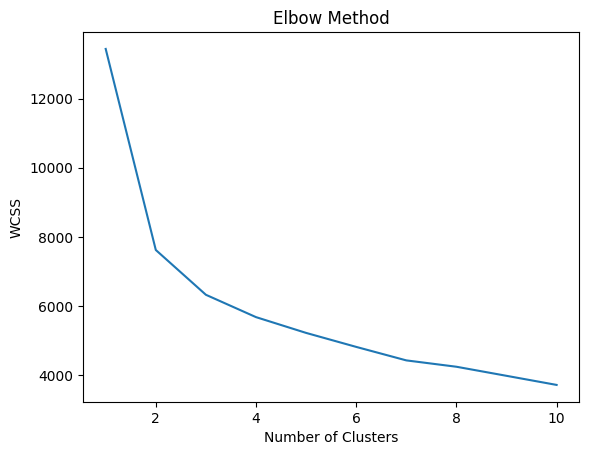

In [27]:
wcss = [] # crear una lista para almacenar los valores de WCSS

# Calcular el WCSS para diferentes valores de k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Caracterización de los clusters

In [36]:
# Seleccionar las variables para el análisis
selected_features = ['Education', 'Marital_Status', 'Income', 'MntWines', 'cluster']
cluster_data = df[selected_features]

Visualicemos la distribución de 'Education' y 'Marital_Status' en cada cluster usando gráficos de barras:

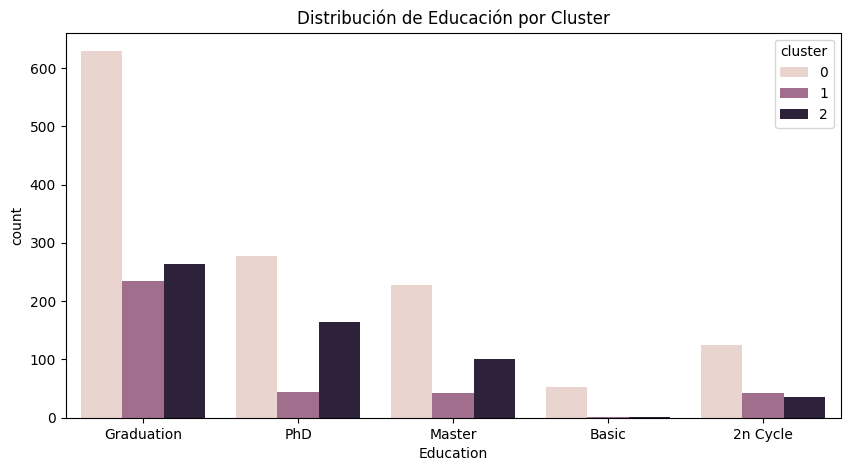

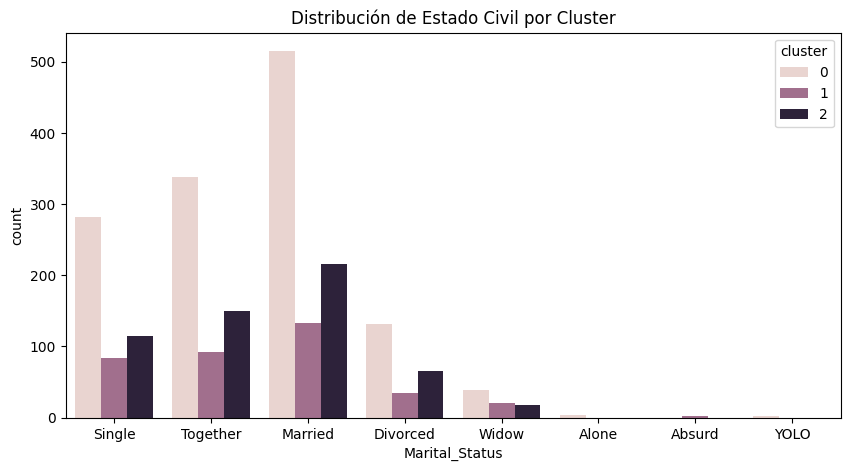

In [37]:
# Gráfico de barras para 'Education'
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', hue='cluster', data=cluster_data)
plt.title('Distribución de Educación por Cluster')
plt.show()

# Gráfico de barras para 'Marital_Status'
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', hue='cluster', data=cluster_data)
plt.title('Distribución de Estado Civil por Cluster')
plt.show()

Para visualizar la relación entre 'Income' y 'MntWines' en cada cluster, podemos usar un gráfico de dispersión con colores para diferenciar los clusters:

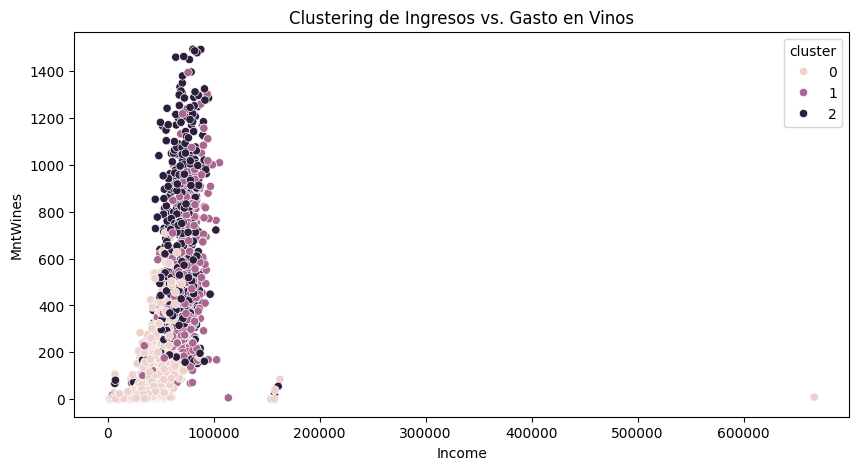

In [38]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Income', y='MntWines', hue='cluster', data=cluster_data)
plt.title('Clustering de Ingresos vs. Gasto en Vinos')
plt.show()

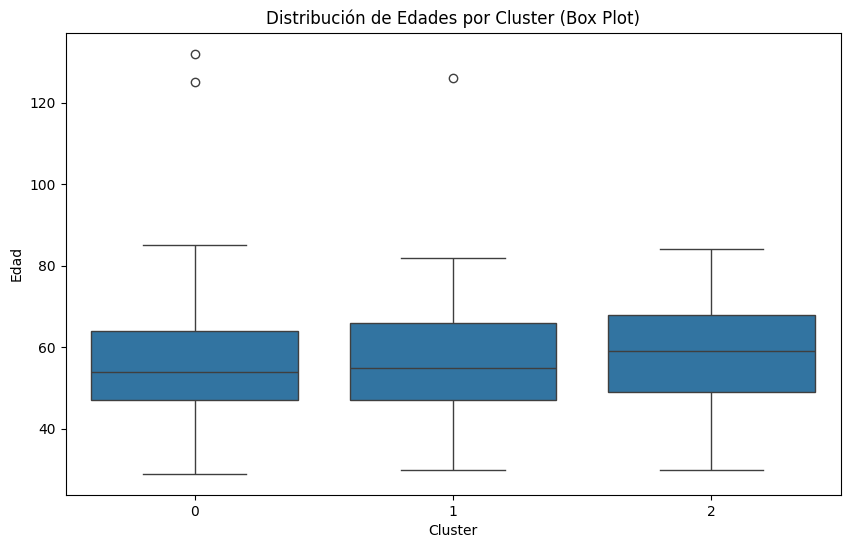

In [42]:
from datetime import datetime

# Obtener el año actual
current_year = datetime.now().year

# Calcular la edad
df['Age'] = current_year - df['Year_Birth']


plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
sns.boxplot(x='cluster', y='Age', data=df)
plt.title('Distribución de Edades por Cluster (Box Plot)')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

Eliminamos los datos atipicos encontrados, identificamos que el cluster

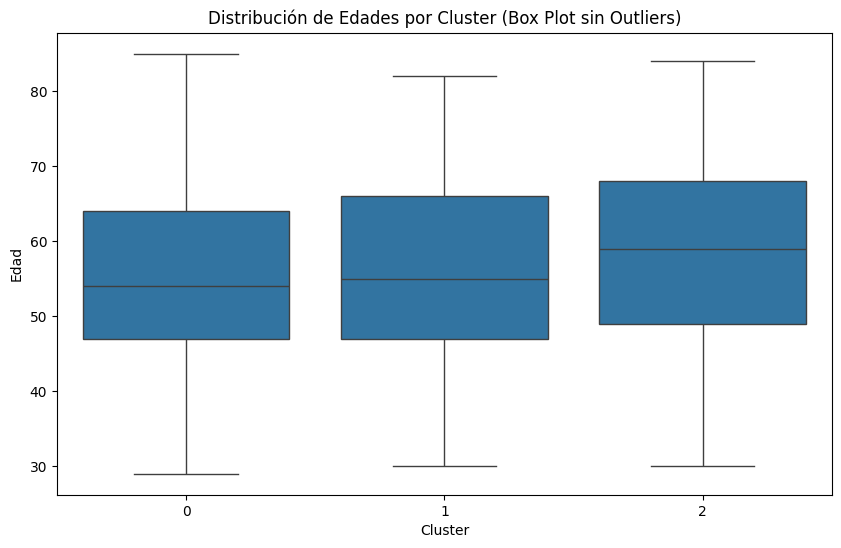

In [44]:
#Calculamos los cuartiles y el IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
#Definimos limite inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Filtramos el dataframe para eliminar outliers del cluster 0 y1
filtered_df = df[~((df['cluster'].isin([0, 1])) & ((df['Age'] < lower_bound) | (df['Age'] > upper_bound)))]
#Creamos de nuevo el grafico
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Age', data=filtered_df)
plt.title('Distribución de Edades por Cluster (Box Plot sin Outliers)')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

In [55]:
def calcular_estadisticas_clusteres(df, cluster_data):
  """
  Calcula estadísticas descriptivas para cada variable dentro de cada clúster.

  Args:
    datos: DataFrame de Pandas con los datos.
    etiquetas_clusteres: Serie de Pandas con las etiquetas de clúster para cada muestra.

  Returns:
    DataFrame de Pandas con las estadísticas descriptivas para cada variable y cada clúster.
  """

  num_clusteres = len(np.unique(cluster_data))
  nombres_variables = df.columns
  estadisticas = ['mean', 'median', 'std', '25%', '50%', '75%']  # Estadísticas a calcular
  resultados = pd.DataFrame(index=nombres_variables, columns=pd.MultiIndex.from_product([range(num_clusteres), estadisticas], names=['cluster', 'statistic']))

  for i in range(num_clusteres):
    datos_cluster = df[cluster_data == i]
    for variable in nombres_variables:
      resultados.loc[variable, (i, 'mean')] = datos_cluster[variable].mean()
      resultados.loc[variable, (i, 'median')] = datos_cluster[variable].median()
      resultados.loc[variable, (i, 'std')] = datos_cluster[variable].std()
      resultados.loc[variable, (i, '25%')] = datos_cluster[variable].quantile(0.25)
      resultados.loc[variable, (i, '50%')] = datos_cluster[variable].quantile(0.50)
      resultados.loc[variable, (i, '75%')] = datos_cluster[variable].quantile(0.75)

  return resultados

# Ejemplo de uso:
# Supongamos que tienes un DataFrame llamado 'cluster_data' con tus datos
# y una Serie llamada 'cluster' con las etiquetas de clúster para cada muestra.

# resultados_estadisticas = calcular_estadisticas_clusteres(cluster_data, cluster_data['cluster'])
# print(resultados_estadisticas)

In [56]:
resultados_estadisticas=calcular_estadisticas_clusteres(cluster_data,cluster_data['cluster'])
print(resultados_estadisticas)  # Imprimir el DataFrame con las estadísticas

TypeError: Could not convert string 'GraduationGraduationPhDPhDPhDPhDGraduationBasicMasterGraduationGraduationGraduation2n CycleGraduationPhDGraduationGraduationGraduationGraduationMasterMasterGraduationPhDMaster2n CycleGraduationMasterGraduationPhDMaster2n CycleGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationGraduation2n CyclePhDGraduationGraduation2n CycleGraduationGraduationGraduation2n CycleMasterGraduationMasterGraduationGraduationGraduationMasterPhDGraduationGraduationGraduationPhD2n CyclePhDBasicGraduationGraduationMasterPhDGraduation2n CycleGraduationMasterMasterGraduationMasterPhDPhDMasterPhDBasicPhDPhDPhDGraduationGraduationGraduation2n CycleMasterMasterGraduation2n CycleGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationPhD2n CycleMasterBasicGraduationPhDPhDBasic2n CycleGraduationGraduationGraduationPhDGraduationPhDMasterGraduationMasterGraduationGraduationPhDMasterGraduation2n CycleMaster2n CyclePhDPhDGraduationPhDGraduationGraduationGraduation2n CycleMasterPhDGraduation2n CycleGraduationPhDMasterGraduation2n CyclePhDGraduationGraduationPhDGraduationMasterPhDMasterMasterPhDGraduationMasterPhDGraduationGraduationPhDBasicGraduationPhDMasterGraduationMaster2n CycleGraduationGraduationGraduation2n CycleMasterGraduation2n CyclePhDGraduationGraduationGraduationMasterMasterGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationPhDPhDGraduationPhDMasterGraduationGraduationGraduationPhDBasicGraduationGraduationMasterGraduationGraduationPhDPhDGraduationPhDGraduationGraduation2n CycleGraduationMasterPhDMasterGraduationGraduationGraduationPhDGraduationGraduation2n CycleMasterGraduationMasterGraduationMasterPhDGraduationGraduationGraduation2n Cycle2n CycleGraduationGraduationPhDGraduationPhDPhDPhDGraduation2n CycleGraduation2n CycleMasterPhDGraduationMasterGraduation2n CycleGraduationMasterMasterPhD2n CycleGraduationPhDGraduationGraduation2n CycleGraduationMasterGraduationPhDMaster2n CycleGraduationMasterGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterPhDGraduationMasterMasterGraduationGraduationGraduation2n CycleGraduationPhDMasterGraduationGraduationMasterBasicMasterGraduationPhDGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationMasterPhDMasterGraduationGraduationMasterGraduation2n CycleMaster2n CycleGraduationPhD2n CycleGraduationGraduationMaster2n CycleGraduationPhDGraduationGraduation2n CycleGraduationPhDPhDMasterGraduationGraduationGraduationPhD2n CyclePhDMasterGraduationGraduationPhDMasterPhDGraduation2n CycleMasterGraduation2n CycleGraduationGraduationPhDGraduationPhDMasterGraduationMaster2n CycleGraduationGraduationPhDMasterMasterGraduationGraduationBasicMasterMasterBasicGraduationGraduationMasterPhDGraduationMasterPhDGraduation2n CycleGraduationPhDGraduation2n CycleGraduationGraduationPhDMasterGraduationPhDGraduationGraduationGraduation2n CyclePhDGraduationGraduationBasicMasterGraduationPhDBasicPhD2n CycleMasterGraduation2n CycleGraduationPhDMasterBasicMasterMasterGraduationPhDMasterPhDGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterPhDPhDPhDMasterBasicMasterPhD2n Cycle2n CycleGraduationPhDMasterPhD2n CycleGraduationPhDGraduation2n CycleMasterGraduationPhDGraduationPhDMasterGraduationGraduationGraduationGraduationBasicMasterGraduationGraduationGraduationGraduationMasterGraduationMasterGraduationGraduationMasterMasterGraduationGraduationGraduationPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationPhDPhD2n CycleGraduationMaster2n CycleGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDPhDMasterGraduationGraduationMasterGraduation2n Cycle2n CyclePhDMasterMasterGraduationGraduation2n CycleGraduation2n CycleGraduationGraduationGraduation2n CyclePhDGraduationGraduationMasterBasicPhDGraduationGraduationGraduationGraduationGraduationGraduationPhDMaster2n CyclePhDMasterPhDGraduationBasicPhDBasicGraduationGraduationPhDPhDMasterPhDMasterPhDGraduationPhDPhDMasterPhDGraduationGraduationPhDPhD2n Cycle2n CycleMasterGraduation2n CycleGraduationMasterPhDPhD2n CycleMasterGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationGraduationPhDPhDGraduationMasterMasterMasterGraduationGraduationGraduationGraduationPhDMasterGraduationGraduationBasicPhD2n CycleGraduationPhDMasterPhDGraduationGraduationGraduationMasterMasterGraduationPhD2n CycleMasterGraduationPhDPhDPhDGraduationGraduationPhDGraduationGraduation2n CycleMasterPhDGraduationGraduationGraduationGraduationPhDPhDPhDGraduationMaster2n CycleGraduationGraduationGraduationPhD2n Cycle2n CycleGraduationPhDPhDPhDBasic2n CyclePhDMasterGraduationGraduationGraduationGraduationBasicGraduationGraduation2n CyclePhDMasterGraduationGraduation2n CyclePhDMasterGraduationGraduationPhDGraduationGraduationMasterPhDGraduationGraduationGraduationGraduationPhDGraduation2n CycleGraduationBasic2n CycleMasterBasicMasterMasterGraduationGraduationGraduationGraduationBasicGraduationGraduationGraduationPhD2n CycleGraduationGraduationMaster2n CycleGraduationMasterGraduationMasterGraduationPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationBasicGraduationGraduationPhDGraduationMasterMasterGraduationPhDGraduationGraduationPhDMasterGraduationGraduationBasicPhDPhDGraduationBasicGraduationPhDPhDGraduationPhDGraduationGraduationGraduationPhDGraduationMasterMasterMasterGraduationGraduationPhDMasterGraduationPhD2n CycleGraduationGraduation2n CyclePhDPhDMasterPhDGraduationMaster2n CycleGraduationGraduationPhDMaster2n CyclePhD2n CycleGraduationGraduationMasterBasicGraduationPhDGraduationGraduationGraduationMasterGraduationGraduationGraduationMasterGraduationBasicGraduation2n CyclePhDGraduationGraduationGraduationMasterBasicGraduation2n CycleGraduationGraduationMasterGraduationGraduation2n CycleMasterPhDGraduationGraduationGraduationMasterMasterMaster2n CycleGraduation2n CycleGraduationPhD2n CycleGraduationMasterGraduationPhD2n CyclePhDMasterGraduationGraduationGraduationGraduationGraduationMasterPhDMasterGraduationPhDMasterGraduationBasicGraduationGraduationGraduationPhDPhDGraduationGraduationPhDPhD2n CycleMaster2n CycleGraduationGraduation2n CycleGraduation2n CycleGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationMasterPhDGraduationMasterGraduationPhD2n CycleGraduationGraduationGraduationPhDMaster2n CycleGraduationPhDMasterPhDGraduationGraduationGraduationMaster2n CycleGraduationMaster2n CycleGraduationGraduationMasterGraduationGraduationPhDGraduationGraduationGraduationGraduation2n CycleMaster2n Cycle2n CycleGraduationGraduationPhDGraduationMaster2n CycleGraduation2n CycleMasterMasterMasterGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationMasterGraduationPhDGraduationGraduationMasterGraduationMasterPhDMasterGraduationGraduationPhDBasicMasterPhDPhDMasterGraduationPhDMasterGraduationGraduationPhDMasterPhD2n CycleGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDGraduation2n CyclePhDPhDGraduationPhDPhDGraduationMasterMasterBasicMasterMasterPhDGraduationGraduationPhDMasterMasterPhDGraduationGraduationPhD2n CyclePhDPhD2n CycleGraduationBasicPhDGraduationGraduationPhDPhDGraduationGraduationPhD2n CycleGraduation2n CyclePhDMasterGraduationPhDBasicPhDGraduationPhDGraduationBasicGraduationGraduationGraduationPhDMasterGraduationBasicPhDGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDPhDBasicGraduation2n CyclePhDGraduationBasicGraduationMasterPhD2n CycleGraduation2n CyclePhDBasicMasterPhDPhDGraduationGraduationGraduationPhDPhDBasicPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterGraduationMasterMasterGraduationGraduationGraduationGraduationPhDGraduationPhDMasterMasterGraduationPhDMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterMasterPhDPhDGraduationPhDGraduationGraduationMasterMaster2n CycleGraduationGraduationMasterGraduationMasterPhDGraduationPhDGraduation2n CyclePhDPhDPhDGraduationPhDGraduationGraduationGraduationGraduationBasicPhDPhDGraduationMasterGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationPhD2n CycleMasterPhDPhDMasterMaster2n CyclePhDPhDMasterGraduationGraduationGraduationMasterGraduationGraduationPhDPhDGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduation2n CyclePhDGraduationMasterGraduationPhDMasterGraduationGraduationGraduationGraduationGraduationGraduationMasterGraduationPhDPhD2n CycleGraduationPhDGraduationGraduationMasterGraduationGraduationPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationMasterGraduationMasterGraduationGraduation2n CycleGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationMasterBasicGraduationMasterGraduationGraduationGraduationMasterMasterBasicGraduationPhDGraduationMaster2n CycleBasicBasicMasterMasterGraduationMasterMaster2n CycleGraduationMaster2n CycleGraduationGraduationGraduationGraduationPhDBasicGraduationGraduationGraduationMasterMasterGraduationGraduationGraduationGraduationPhDMasterPhDPhDMasterGraduationGraduationMaster2n Cycle2n CycleMasterPhDGraduationGraduationGraduationBasicPhDGraduationGraduationGraduationPhDGraduationGraduationPhDGraduationBasic2n CycleBasicGraduationGraduationMasterGraduationGraduationBasicPhDGraduationGraduationGraduationBasicGraduation2n CycleMasterGraduationGraduationGraduationGraduationMasterGraduation2n CycleMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhD' to numeric